In [ ]:
%pip freeze
%pip install matplotlib
%pip install pandas

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
df = pd.read_csv('soup.csv')
df.head()

,Category,Name,Fat(g),Carbs(g),Prot(g),Calories,Net Carbs(g),Sugar(g),Fiber(g),Total Carbs(g),...,Poly(g),Sat(g),Total Fat(g),Cholesterol(mg),Iron,Calcium,Vitamin A,Vitamin C,Vitamin D,Sodium(mg)
0,Vegetable Soups,Barley Soup,0.76,17.91,4.78,95,14.21,0.20,3.7,17.91,...,0.15,0.30,0.76,0.0,0.95,20,0.0,0.0,0.0,722
1,Vegetable Soups,Broccoli Soup,11.90,17.92,8.15,206,15.82,10.31,2.1,17.92,...,2.64,3.77,11.90,14.0,2.56,792,706.0,133.5,0.0,789
2,Vegetable Soups,Butternut Squash Soup,2.06,17.91,2.22,90,15.71,4.34,2.2,17.91,...,0.12,1.31,2.06,3.0,1.09,41,218.0,8.1,0.0,485
3,Vegetable Soups,Cabbage Soup,3.26,7.69,3.92,71,5.99,4.04,1.7,7.69,...,0.98,0.62,3.26,0.0,8.63,539,539.0,212.1,0.0,316
4,Vegetable Soups,Chunky Vegetable Soup,3.70,19.01,3.50,122,17.81,3.94,1.2,19.01,...,1.39,0.55,3.70,0.0,1.63,55,290.0,6.0,0.0,1010


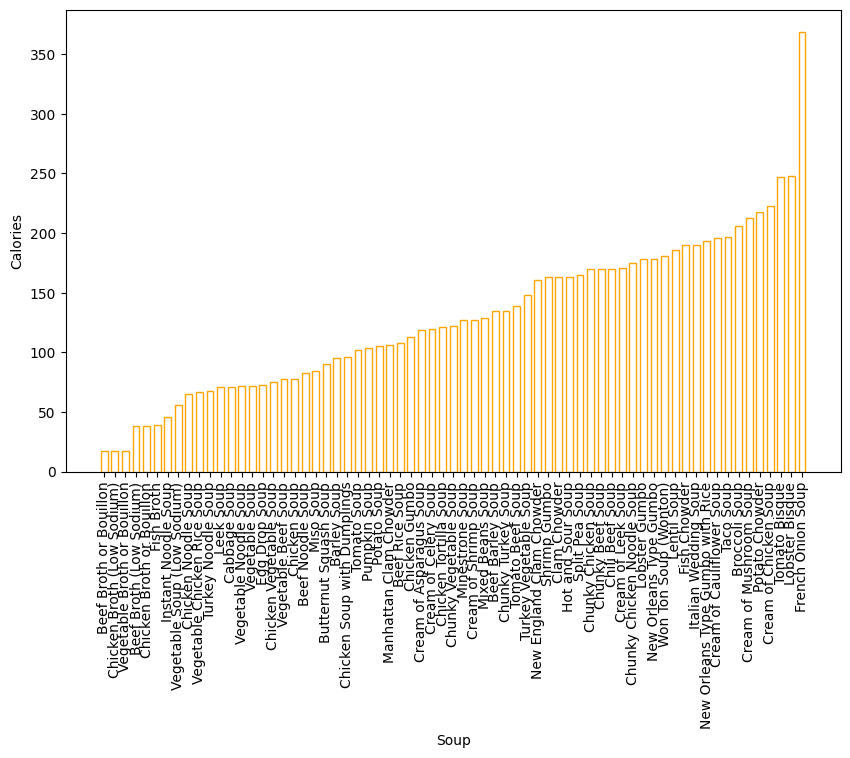

In [83]:
filtered_df = df[['Name', 'Calories']]
filtered_df = filtered_df.sort_values(by='Calories')
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Name'], filtered_df['Calories'], width=0.65, edgecolor="orange", facecolor="none")
plt.ylabel('Calories')
plt.xlabel('Soup')
plt.xticks(rotation=90)
plt.show()

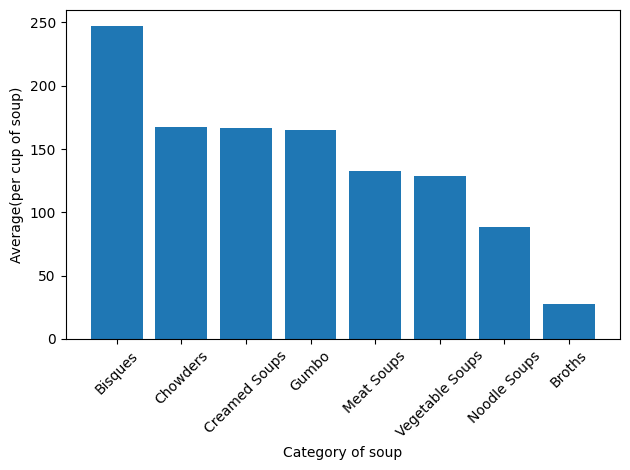

In [84]:
filtered_df = df[['Category', 'Calories']].groupby('Category').mean()
filtered_df = filtered_df.reset_index()
filtered_df = filtered_df.sort_values(by='Calories', ascending=False)
plt.bar(filtered_df['Category'], filtered_df['Calories'])
plt.xticks(rotation=45)
plt.xlabel('Category of soup')
plt.ylabel('Average(per cup of soup)')
plt.tight_layout()
plt.show()

In [85]:
filtered_df = df[['Category', 'Fat(g)', 'Prot(g)', 'Carbs(g)']].groupby('Category')[['Fat(g)', 'Prot(g)', 'Carbs(g)']].mean()
filtered_df = filtered_df.reset_index()
sum_df = filtered_df.iloc[:, 1:].sum(axis=1)
filtered_df = pd.concat((filtered_df['Category'], filtered_df.iloc[:, 1:].div(sum_df, axis=0)), axis=1)
print(filtered_df)

          Category    Fat(g)   Prot(g)  Carbs(g)
0          Bisques  0.173548  0.239434  0.587018
1           Broths  0.146074  0.628176  0.225751
2         Chowders  0.198476  0.315752  0.485772
3    Creamed Soups  0.323659  0.176174  0.500166
4            Gumbo  0.191697  0.310117  0.498186
5       Meat Soups  0.161571  0.318757  0.519672
6     Noodle Soups  0.154935  0.281417  0.563647
7  Vegetable Soups  0.163138  0.221577  0.615285


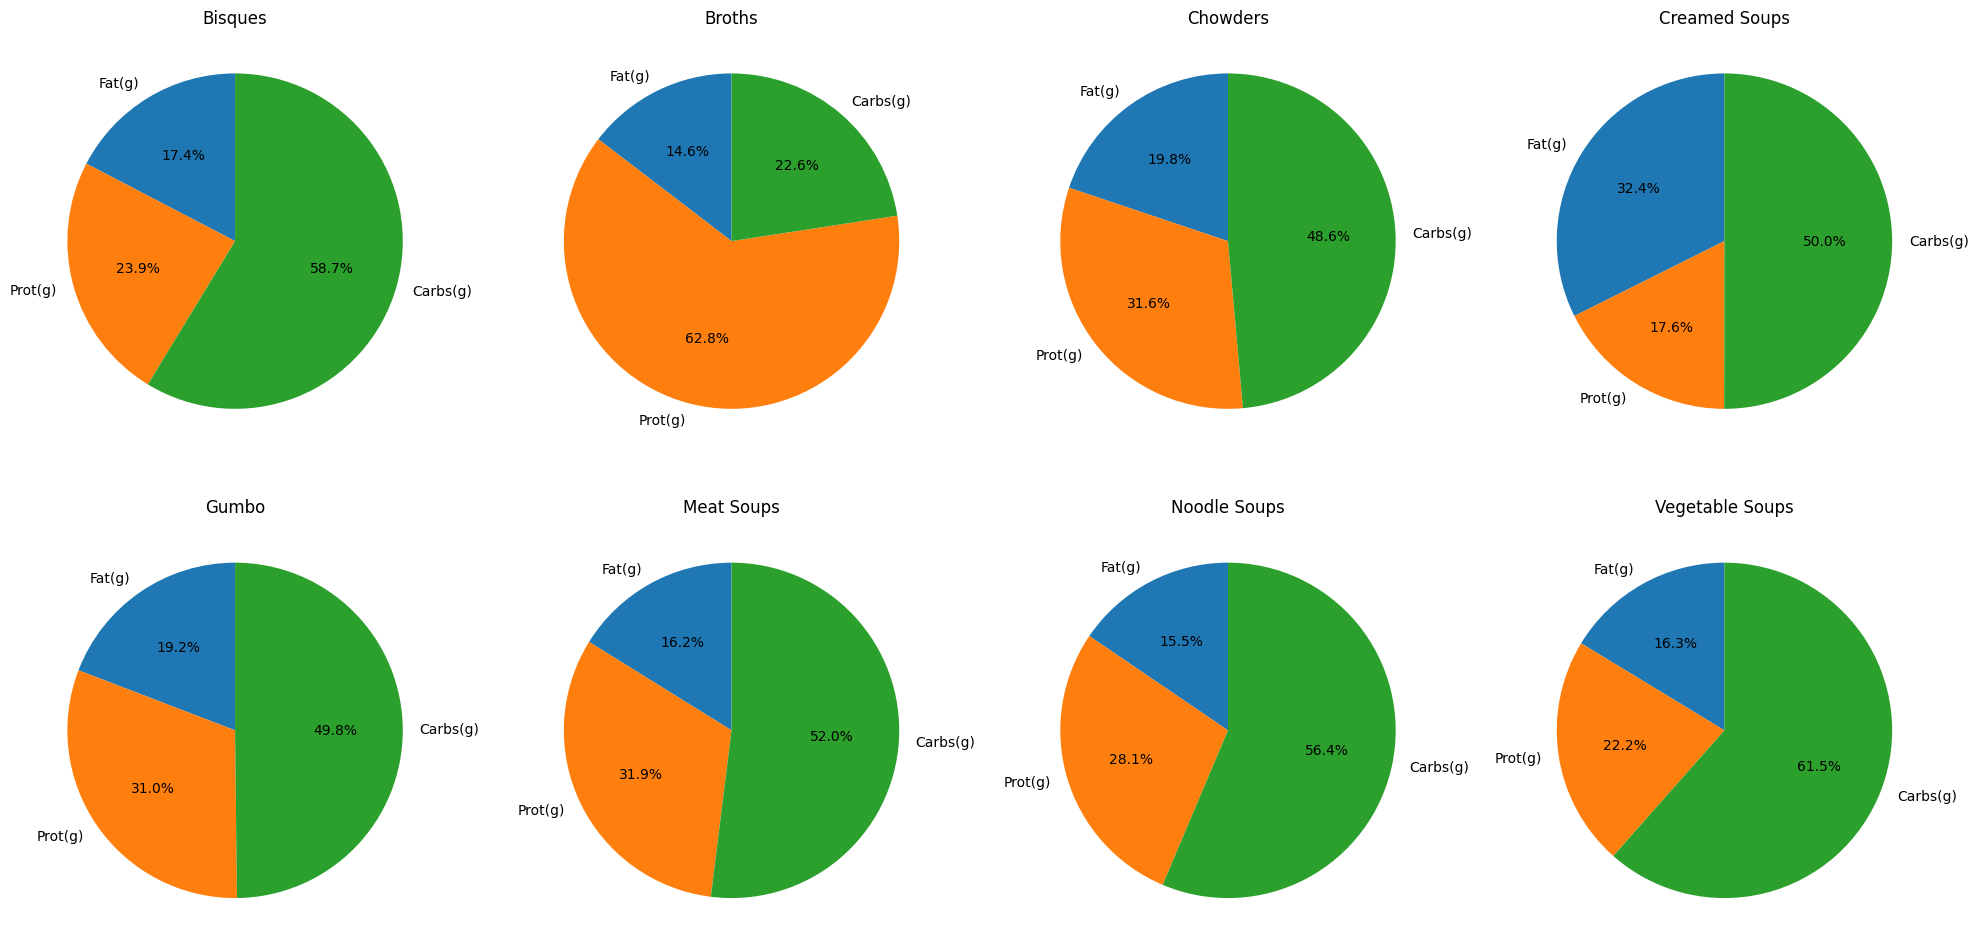

In [86]:
columns = filtered_df.columns[1:]

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

ax[0, 0].pie(filtered_df.iloc[0, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[0, 0].set_title(filtered_df.iloc[0, 0])

ax[0, 1].pie(filtered_df.iloc[1, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[0, 1].set_title(filtered_df.iloc[1, 0])

ax[0, 2].pie(filtered_df.iloc[2, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[0, 2].set_title(filtered_df.iloc[2, 0])

ax[0, 3].pie(filtered_df.iloc[3, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[0, 3].set_title(filtered_df.iloc[3, 0])

ax[1, 0].pie(filtered_df.iloc[4, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[1, 0].set_title(filtered_df.iloc[4, 0])

ax[1, 1].pie(filtered_df.iloc[5, 1:], labels=columns, autopct='%1.1f%%', startangle=90) 
ax[1, 1].set_title(filtered_df.iloc[5, 0])

ax[1, 2].pie(filtered_df.iloc[6, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[1, 2].set_title(filtered_df.iloc[6, 0])

ax[1, 3].pie(filtered_df.iloc[7, 1:], labels=columns, autopct='%1.1f%%', startangle=90)
ax[1, 3].set_title(filtered_df.iloc[7, 0])

plt.tight_layout()
plt.show()